# Trabalho Final Mininet

Nome : Júlia de Freitas Carvalho

Matrícula: 1933 


## Exercicio 1

### Criando a Topologia

Topologia arvore com profundidade quatro e 
ramificação três  considerando o endereço MAC padronizado, 
larguras de banda bw de 35 Mbps e controlador do 
Mininet (não precisa especificar)

- 5 Níveis (0 a 4)
- 3 ramificações por nó

Estrutura da árvore

  Nível 0: 1 switch (raiz)

  Nível 1: 3 switches (filhos da raiz)

  Nível 2: 9 switches

  Nível 3: 27 switches

  Nível 4: 81 hosts (folhas)

  Codigo para criaçao da Topologia:

In [ ]:
from mininet.topo import Topo
from mininet.link import TCLink
from mininet.net import Mininet
from mininet.node import Controller
from mininet.cli import CLI

class CustomTreeTopo(Topo):
    def build(self, depth=4, fanout=3, bw=35):
        self.hostNum = 1
        self._build_tree(None, depth, fanout, bw)

    def _build_tree(self, parent, depth, fanout, bw):
        if depth == 0:
            # Cria host e conecta ao switch pai
            host = self.addHost(f'h{self.hostNum:03d}')
            self.hostNum += 1
            self.addLink(parent, host, cls=TCLink, bw=bw)
        else:
            # Cria switch
            switch = self.addSwitch(f's{depth}_{self.hostNum:03d}')
            if parent:
                self.addLink(parent, switch, cls=TCLink, bw=bw)
            for _ in range(fanout):
                self._build_tree(switch, depth - 1, fanout, bw)

if __name__ == '__main__':
    topo = CustomTreeTopo()
    net = Mininet(topo=topo, controller=Controller, link=TCLink)
    net.start()
    CLI(net)
    net.stop()


Execução da topologia:

In [ ]:
 sudo mn --custom arvore.py --topo mytopo --mac --link tc


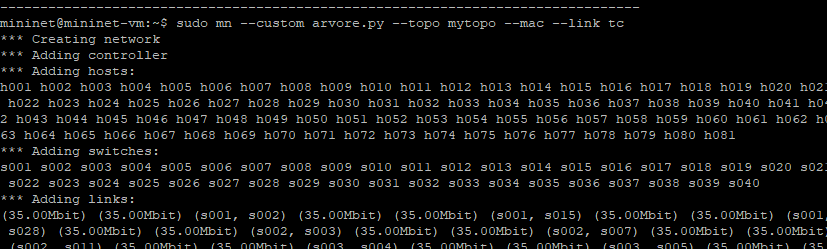

### Inspecionando Nós da topologia

Comando para verificar todos os nós da topologia: 

In [ ]:
mininet> nodes

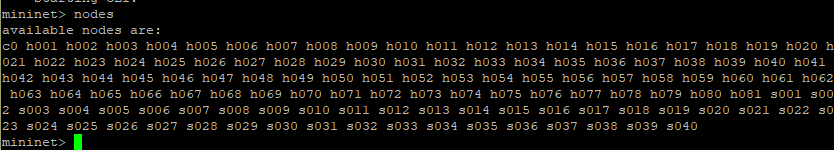

###  Verificando MAC e IP de um host específico

Lendo hosts h1 e h20, onde cada um possui seu próprio endereço IP e MAC. endereço MAC e sua própria interface de rede.

comando:

In [ ]:
mininet> h001 ifconfig
mininet> h020 ifconfig


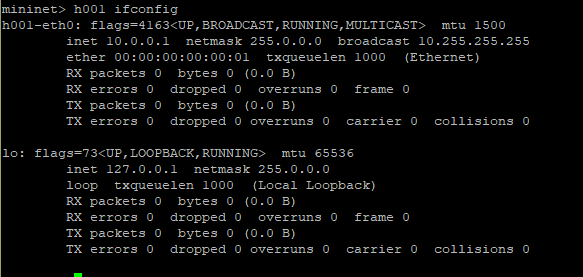

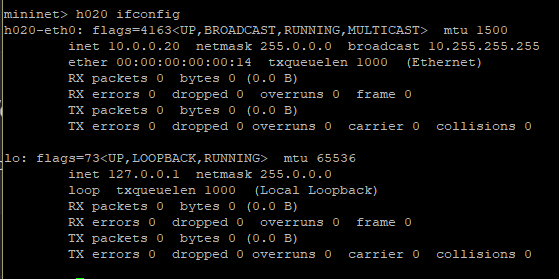

### Verificando portas e conexões de um Switch

Comando:

In [ ]:
mininet> sudo ovs-ofctl show s2

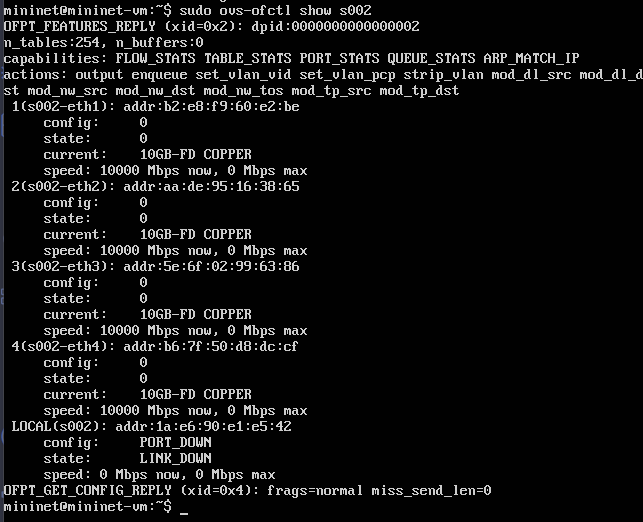

### Testes de ping entre os nós

comando para realizar ping entre todos os host: 

In [ ]:
 mininet> pingall


Parte do teste de ping: 

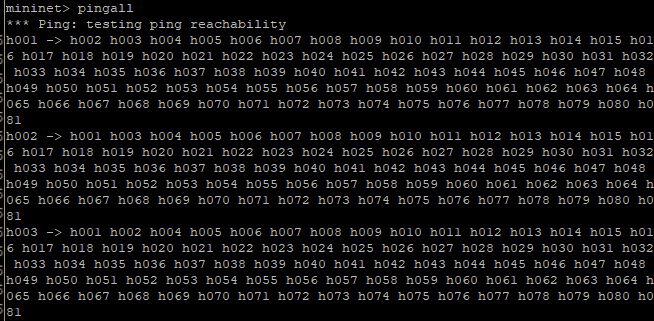

### Teste de ping entre dois hosts (h001 e h081)

comando:

In [ ]:
mininet> h001 ping -c 4 h081

### Capturar Pacotes com TCPDUMP

Abre um terminal e executa o seguinte comando que ira capturar todos os pacotes que passam pela interface h81-eth0:

In [ ]:
mininet> h081 tcpdump -i h081-eth0


Em outro prompt do mininet, realiza-se o ping do hots h001 no host h081

Comando:

mininet> h001 ping -c 4 h081

A saída do tcpdump seria o recebimento dos pacotes de ping advindos de h1 e os dados sobre os pacotes recebidos. Algo semelhante a isto:

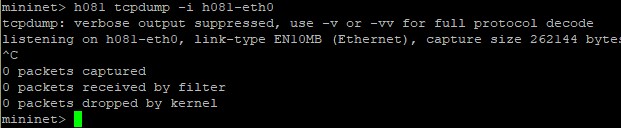




### Testes de Iperf

#### Topologia com 5 bw.

Cria os terminais para cada host h001 e h002.

In [ ]:
xterm h001 &
xterm h002 &


No terminal h001:

In [ ]:
iperf -s -p 5555


No terminal h002:

In [ ]:
iperf -c 10.0.0.1 -p 5555 -t 20 -i 1 > resultado_bw5.txt


#### Topologia com 10 bw

Inicia a topologia com 10 bw

In [ ]:
sudo mn --custom topo_arvore.py --topo mytopo,bw=10 --mac --link tc

Cria os terminais para h001 e h002 

In [ ]:
mininet> xterm h001
mininet> xterm h002 


No terminal h001:

In [ ]:
mininet> iperf -s -p 5555


No terminal h002:

In [ ]:
mininet> iperf -c 10.0.0.1 -p 5555 -t 20 -i 1 > bw10.txt


#### Topologia com 25 bw

Inicia a topologia com 25 bw

In [ ]:
sudo mn --custom topo_arvore.py --topo mytopo,bw=25 --mac --link tc


Cria os terminais para h001 e h002 

In [ ]:
mininet> xterm h001 
mininet> xterm h002


No terminal h001:

In [ ]:
mininet> iperf -s -p 5555

No terminal h002:

In [ ]:
mininet> iperf -c 10.0.0.1 -p 5555 -t 20 -i 1 > bw25.txt



#### Topologia com 35 bw

Inicia a topologia com 35 bw

In [ ]:
sudo mn --custom topo_arvore.py --topo mytopo,bw=35 --mac --link tc

Cria os terminais para h001 e h002 

In [ ]:
mininet> xterm h001
mininet> xterm h002

No terminal h001:

In [ ]:
mininet> iperf -s -p 5555

No terminal h002:

mininet> iperf -c 10.0.0.1 -p 5555 -t 20 -i 1 > bw35.txt

## Exercicio 2

### Criando a topologia da rede. 

Codigo:

In [ ]:
from mininet.topo import Topo

class CustomTopo(Topo):
    def build(self):
        # Hosts
        h1 = self.addHost('h1')
        h2 = self.addHost('h2')
        h3 = self.addHost('h3')
        h4 = self.addHost('h4')
        h5 = self.addHost('h5')
        h6 = self.addHost('h6')
        h7 = self.addHost('h7')
        h8 = self.addHost('h8')

        # Switches
        s1 = self.addSwitch('s1')
        s2 = self.addSwitch('s2')
        s3 = self.addSwitch('s3')
        s5 = self.addSwitch('s5')

        # Links conforme a imagem
        self.addLink(h1, s1)
        self.addLink(s1, s2)
        self.addLink(h2, s2)
        self.addLink(h5, s2)
        self.addLink(s2, s3)
        self.addLink(s2, s5)
        self.addLink(h3, s5)
        self.addLink(h4, s5)
        self.addLink(h6, s3)
        self.addLink(h7, s3)
        self.addLink(h8, s3)

topos = {"mytopo": (lambda: CustomTopo())}


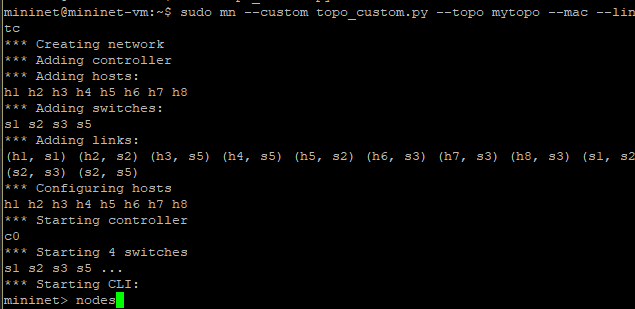

### Verificando todos os nós


In [ ]:
mininet> nodes


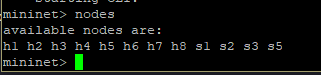

### Verificando toda a rede

In [ ]:
mininet> net

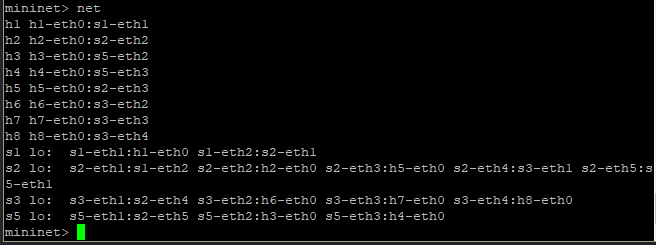

### Detalhes de todos os dispositivos

In [ ]:
mininet> dump

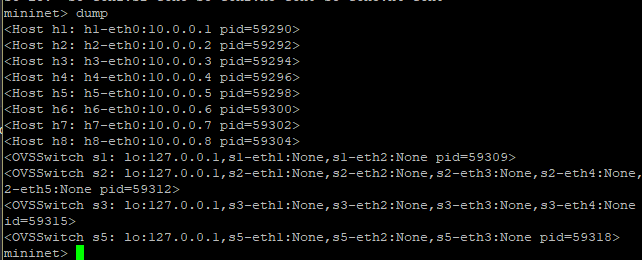

### Verificando IP, MAC e interfaces por host

In [ ]:
mininet> h1 ifconfig
mininet> h2 ifconfig

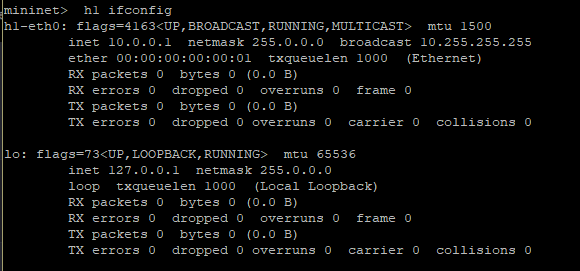


### Verificando rotas

In [ ]:
mininet> h1 route

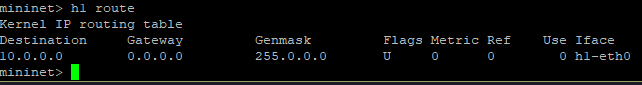

### Testes de ping

In [ ]:
mininet> pingall

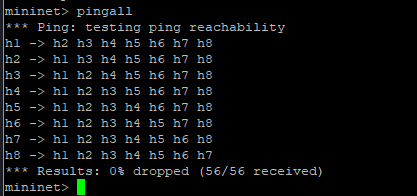

### Ping entre dois hosts h1 e h2



In [ ]:
mininet> h1 ping -c 3 h2


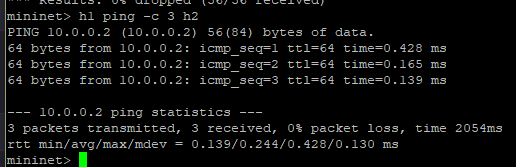

### Apagando as regras de todos os Switches

In [ ]:
mininet> sh ovs-ofctl -O OpenFlow13 del-flows s1
mininet> sh ovs-ofctl -O OpenFlow13 del-flows s2
mininet> sh ovs-ofctl -O OpenFlow13 del-flows s3
mininet> sh ovs-ofctl -O OpenFlow13 del-flows s5

### Obtendo o MAC dos hosts

h6: 00:00:00:00:00:06

h7: 00:00:00:00:00:07




### Verificando portas do Switch S3

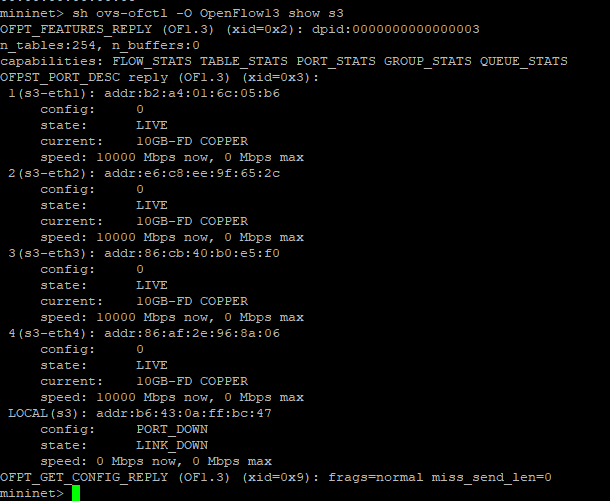






### Adicionando regras baseadas em MAC

Permitir que h1 se comunique com h5 (em switches diferentes)

Sabendo que os endereços MAC de cada são:

h1: 00:00:00:00:00:01

h5: 00:00:00:00:00:05

In [ ]:
mininet> sh ovs-ofctl -O OpenFlow13 add-flow s3 "dl_dst=00:00:00:00:00:06,actions=output:1"
mininet> sh ovs-ofctl -O OpenFlow13 add-flow s3 "dl_dst=00:00:00:00:00:07,actions=output:2"


### Testes de ping para as regras aplicadas

In [ ]:
h6 ping -c 3 h7


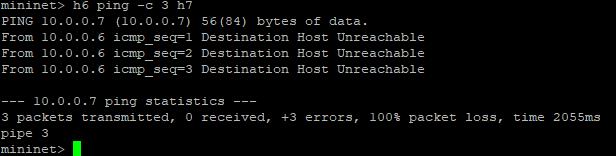